In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_1samp
file='/content/drive/MyDrive/Colab_Notebooks/NY_Listings.csv'
 
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
 
df=pd.read_csv(file,encoding='ISO-8859-1')

pd.set_option('display.max_columns', None)


Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head(5)

Listing ID                                              Name    Host ID  \
0        2515                                Sunny Private Room   16286162   
1        2539                Comfy bedroom minutes to Manhattan   44260966   
2        2595  Spacious RM in Private Home; Backyard/Near Metro  105394139   
3        3330                            Modern Bronx Treasure!  104262517   
4        3647                              Good Vibes Sanctuary   58126473   

  Host Name  Host Response Rate  Host Is Superhost  Host total listings count  \
0       Pat                 1.0              False                        4.0   
1    Alicia                 1.0              False                        1.0   
2   Ciprian                 1.0              False                       16.0   
3   Felicia                 0.7              False                        1.0   
4    Miriam                 1.0              False                        1.0   

                      Street   City Neighbourhood cleansed State  \
0   Bronx| NY| United States  Bronx               Allerton    NY   
1   Bronx| NY| United States  Bronx              Soundview    NY   
2   Bronx| NY| United States  Bronx                Fordham    NY   
3  Bronx | NY| United States  Bronx                Fordham    NY   
4   Bronx| NY| United States  Bronx                Fordham    NY   

         Country   latitude  longitude Property type        Room type  \
0  United States  40.866889 -73.857756         House     Private room   
1  United States  40.829392 -73.865137         House     Private room   
2  United States  40.869139 -73.895096         House     Private room   
3  United States  40.868719 -73.891438     Apartment  Entire home/apt   
4  United States  40.863628 -73.894787     Apartment     Private room   

   Accommodates  Bathrooms  Bedrooms  \
0           1.0        1.0       1.0   
1           1.0        1.0       1.0   
2           4.0        3.0       2.0   
3           4.0        1.0       1.0   
4           2.0        1.0       1.0   

                                           Amenities  Price  Minimum nights  \
0  Cable TV;Internet;Wireless Internet;Kitchen;Fr...     43               2   
1  TV;Internet;Wireless Internet;Air conditioning...     28               2   
2  Internet;Wireless Internet;Air conditioning;Ki...     80               3   
3  TV;Internet;Wireless Internet;Air conditioning...    140               2   
4  TV;Wireless Internet;Air conditioning;Kitchen;...     60               1   

   Maximum nights  Availability 365 Calendar last scraped  Number of reviews  \
0            30.0               276               10/2/17                 66   
1            31.0               345               10/2/17                 38   
2            31.0               355               10/2/17                 18   
3          1125.0               358               10/2/17                  7   
4          1125.0               360               10/3/17                 56   

  Last Review Date  Review Scores Rating  Review Scores Accuracy  \
0          8/25/17                    96                      10   
1           9/8/17                    89                      10   
2           9/4/17                    90                       9   
3          4/23/17                    85                       9   
4          9/20/17                    95                      10   

   Review Scores Cleanliness  Review Scores Checkin  \
0                          9                     10   
1                          9                      9   
2                          9                     10   
3                         10                      8   
4                         10                     10   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                           10                       9                   10   
1                           10                       9                    9   
2                        

#***Pre-Processing***

In [3]:
df.dtypes

Listing ID                       int64
Name                            object
Host ID                          int64
Host Name                       object
Host Response Rate             float64
Host Is Superhost                 bool
Host total listings count      float64
Street                          object
City                            object
Neighbourhood cleansed          object
State                           object
Country                         object
latitude                       float64
longitude                      float64
Property type                   object
Room type                       object
Accommodates                   float64
Bathrooms                      float64
Bedrooms                       float64
Amenities                       object
Price                            int64
Minimum nights                   int64
Maximum nights                 float64
Availability 365                 int64
Calendar last scraped           object
Number of reviews        

In [4]:
df.shape

(75749, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75749 entries, 0 to 75748
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Listing ID                   75749 non-null  int64  
 1   Name                         75718 non-null  object 
 2   Host ID                      75749 non-null  int64  
 3   Host Name                    75517 non-null  object 
 4   Host Response Rate           30631 non-null  float64
 5   Host Is Superhost            75749 non-null  bool   
 6   Host total listings count    75517 non-null  float64
 7   Street                       44310 non-null  object 
 8   City                         75749 non-null  object 
 9   Neighbourhood cleansed       75749 non-null  object 
 10  State                        75749 non-null  object 
 11  Country                      75749 non-null  object 
 12  latitude                     75749 non-null  float64
 13  longitude       

In [6]:
df.isnull().sum()

Listing ID                         0
Name                              31
Host ID                            0
Host Name                        232
Host Response Rate             45118
Host Is Superhost                  0
Host total listings count        232
Street                         31439
City                               0
Neighbourhood cleansed             0
State                              0
Country                            0
latitude                           0
longitude                          0
Property type                      0
Room type                          0
Accommodates                   31439
Bathrooms                      31581
Bedrooms                       31439
Amenities                      31721
Price                              0
Minimum nights                     0
Maximum nights                 31439
Availability 365                   0
Calendar last scraped          31439
Number of reviews                  0
Last Review Date               16683
R

In [7]:
import math
df['Accommodates']=df['Accommodates'].fillna(math.floor(df['Accommodates'].mean()))
df['Bathrooms']=df['Bathrooms'].fillna(math.floor(df['Bathrooms'].mean()))
df['Bedrooms']=df['Bedrooms'].fillna(math.floor(df['Bedrooms'].mean()))
df['Maximum nights']=df['Maximum nights'].fillna(math.floor(df['Maximum nights'].mean()))

In [8]:
df.rename(columns={"Neighbourhood cleansed":"Neighbourhood"},axis=None, copy=True, inplace=True, level=None, errors='ignore')

df.head()

Listing ID                                              Name    Host ID  \
0        2515                                Sunny Private Room   16286162   
1        2539                Comfy bedroom minutes to Manhattan   44260966   
2        2595  Spacious RM in Private Home; Backyard/Near Metro  105394139   
3        3330                            Modern Bronx Treasure!  104262517   
4        3647                              Good Vibes Sanctuary   58126473   

  Host Name  Host Response Rate  Host Is Superhost  Host total listings count  \
0       Pat                 1.0              False                        4.0   
1    Alicia                 1.0              False                        1.0   
2   Ciprian                 1.0              False                       16.0   
3   Felicia                 0.7              False                        1.0   
4    Miriam                 1.0              False                        1.0   

                      Street   City Neighbourhood State        Country  \
0   Bronx| NY| United States  Bronx      Allerton    NY  United States   
1   Bronx| NY| United States  Bronx     Soundview    NY  United States   
2   Bronx| NY| United States  Bronx       Fordham    NY  United States   
3  Bronx | NY| United States  Bronx       Fordham    NY  United States   
4   Bronx| NY| United States  Bronx       Fordham    NY  United States   

    latitude  longitude Property type        Room type  Accommodates  \
0  40.866889 -73.857756         House     Private room           1.0   
1  40.829392 -73.865137         House     Private room           1.0   
2  40.869139 -73.895096         House     Private room           4.0   
3  40.868719 -73.891438     Apartment  Entire home/apt           4.0   
4  40.863628 -73.894787     Apartment     Private room           2.0   

   Bathrooms  Bedrooms                                          Amenities  \
0        1.0       1.0  Cable TV;Internet;Wireless Internet;Kitchen;Fr...   
1        1.0       1.0  TV;Internet;Wireless Internet;Air conditioning...   
2        3.0       2.0  Internet;Wireless Internet;Air conditioning;Ki...   
3        1.0       1.0  TV;Internet;Wireless Internet;Air conditioning...   
4        1.0       1.0  TV;Wireless Internet;Air conditioning;Kitchen;...   

   Price  Minimum nights  Maximum nights  Availability 365  \
0     43               2            30.0               276   
1     28               2            31.0               345   
2     80               3            31.0               355   
3    140               2          1125.0               358   
4     60               1          1125.0               360   

  Calendar last scraped  Number of reviews Last Review Date  \
0               10/2/17                 66          8/25/17   
1               10/2/17                 38           9/8/17   
2               10/2/17                 18           9/4/17   
3               10/2/17                  7          4/23/17   
4               10/3/17                 56          9/20/17   

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                    96                      10                          9   
1                    89                      10                          9   
2                    90                       9                          9   
3                    85                       9                         10   
4                    95                      10                         10   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                     10                           10                       9   
1                      9                           10                       9   
2                     10                            9                       9   
3                      8                            9                       9   
4                     10                           10                       9   

In [9]:
df.drop(['Listing ID','Name','Host ID','Host Name','Host Response Rate','Host Is Superhost','Street','Last Review Date',
         'Calendar last scraped'], axis=1, inplace=True)
df.head(3)


Host total listings count   City Neighbourhood State        Country  \
0                        4.0  Bronx      Allerton    NY  United States   
1                        1.0  Bronx     Soundview    NY  United States   
2                       16.0  Bronx       Fordham    NY  United States   

    latitude  longitude Property type     Room type  Accommodates  Bathrooms  \
0  40.866889 -73.857756         House  Private room           1.0        1.0   
1  40.829392 -73.865137         House  Private room           1.0        1.0   
2  40.869139 -73.895096         House  Private room           4.0        3.0   

   Bedrooms                                          Amenities  Price  \
0       1.0  Cable TV;Internet;Wireless Internet;Kitchen;Fr...     43   
1       1.0  TV;Internet;Wireless Internet;Air conditioning...     28   
2       2.0  Internet;Wireless Internet;Air conditioning;Ki...     80   

   Minimum nights  Maximum nights  Availability 365  Number of reviews  \
0               2            30.0               276                 66   
1               2            31.0               345                 38   
2               3            31.0               355                 18   

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                    96                      10                          9   
1                    89                      10                          9   
2                    90                       9                          9   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                     10                           10                       9   
1                      9                           10                       9   
2                     10                            9                       9   

   Review Scores Value  Reviews per month  
0                   10               1.77  
1                    9               1.54  
2                    9               3.83

In [10]:
df.head(5)

Host total listings count   City Neighbourhood State        Country  \
0                        4.0  Bronx      Allerton    NY  United States   
1                        1.0  Bronx     Soundview    NY  United States   
2                       16.0  Bronx       Fordham    NY  United States   
3                        1.0  Bronx       Fordham    NY  United States   
4                        1.0  Bronx       Fordham    NY  United States   

    latitude  longitude Property type        Room type  Accommodates  \
0  40.866889 -73.857756         House     Private room           1.0   
1  40.829392 -73.865137         House     Private room           1.0   
2  40.869139 -73.895096         House     Private room           4.0   
3  40.868719 -73.891438     Apartment  Entire home/apt           4.0   
4  40.863628 -73.894787     Apartment     Private room           2.0   

   Bathrooms  Bedrooms                                          Amenities  \
0        1.0       1.0  Cable TV;Internet;Wireless Internet;Kitchen;Fr...   
1        1.0       1.0  TV;Internet;Wireless Internet;Air conditioning...   
2        3.0       2.0  Internet;Wireless Internet;Air conditioning;Ki...   
3        1.0       1.0  TV;Internet;Wireless Internet;Air conditioning...   
4        1.0       1.0  TV;Wireless Internet;Air conditioning;Kitchen;...   

   Price  Minimum nights  Maximum nights  Availability 365  Number of reviews  \
0     43               2            30.0               276                 66   
1     28               2            31.0               345                 38   
2     80               3            31.0               355                 18   
3    140               2          1125.0               358                  7   
4     60               1          1125.0               360                 56   

   Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
0                    96                      10                          9   
1                    89                      10                          9   
2                    90                       9                          9   
3                    85                       9                         10   
4                    95                      10                         10   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                     10                           10                       9   
1                      9                           10                       9   
2                     10                            9                       9   
3                      8                            9                       9   
4                     10                           10                       9   

   Review Scores Value  Reviews per month  
0                   10               1.77  
1                    9               1.54  
2                    9               3.83  
3                    9               0.67  
4                   10               3.70

In [11]:
df['City'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

**Summary Statistics**

In [12]:
print("*********************************************************************************************************************************")
print("\t\t\t\t\t\tBasic Statistics\n\n")
print('Mean: \n\n')

print("Price            \tMean:",df['Price'].mean())
print("Number of reviews","\tMean:",df['Number of reviews'].mean())
print("Availability     " ,"\tMean:",df['Availability 365'].mean())
print("Accommodates     " ,"\tMean:",df['Accommodates'].mean())
print("Reviews per month","\tMean:",df['Reviews per month'].mean())




*********************************************************************************************************************************
						Basic Statistics


Mean: 


Price            	Mean: 154.54574977887498
Number of reviews 	Mean: 16.589037479042627
Availability      	Mean: 131.23845859351277
Accommodates      	Mean: 2.4755970375846545
Reviews per month 	Mean: 1.1352155143962435


In [13]:
print('Median: \n\n')

print("Price            \tMedian:",df['Price'].median())
print("Number of reviews","\tMedian:",df['Number of reviews'].median())
print("Availability     " ,"\tMedian:",df['Availability 365'].median())
print("Accommodates     " ,"\tMedian:",df['Accommodates'].median())
print("Reviews per month","\tMedian:",df['Reviews per month'].median())

Median: 


Price            	Median: 105.0
Number of reviews 	Median: 4.0
Availability      	Median: 79.0
Accommodates      	Median: 2.0
Reviews per month 	Median: 0.45


In [14]:
print('Mode: \n\n')
DF=df[['Accommodates','City','Neighbourhood','Property type','Room type','Price','Host total listings count']]
print(DF.mode())


Mode: 


   Accommodates       City Neighbourhood Property type        Room type  \
0           2.0  Manhattan  Williamsburg     Apartment  Entire home/apt   

   Price  Host total listings count  
0    150                        1.0  


In [15]:
df=df[df['latitude']>40]

# ***Visualization***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1038a45a58>,
      dtype=object)

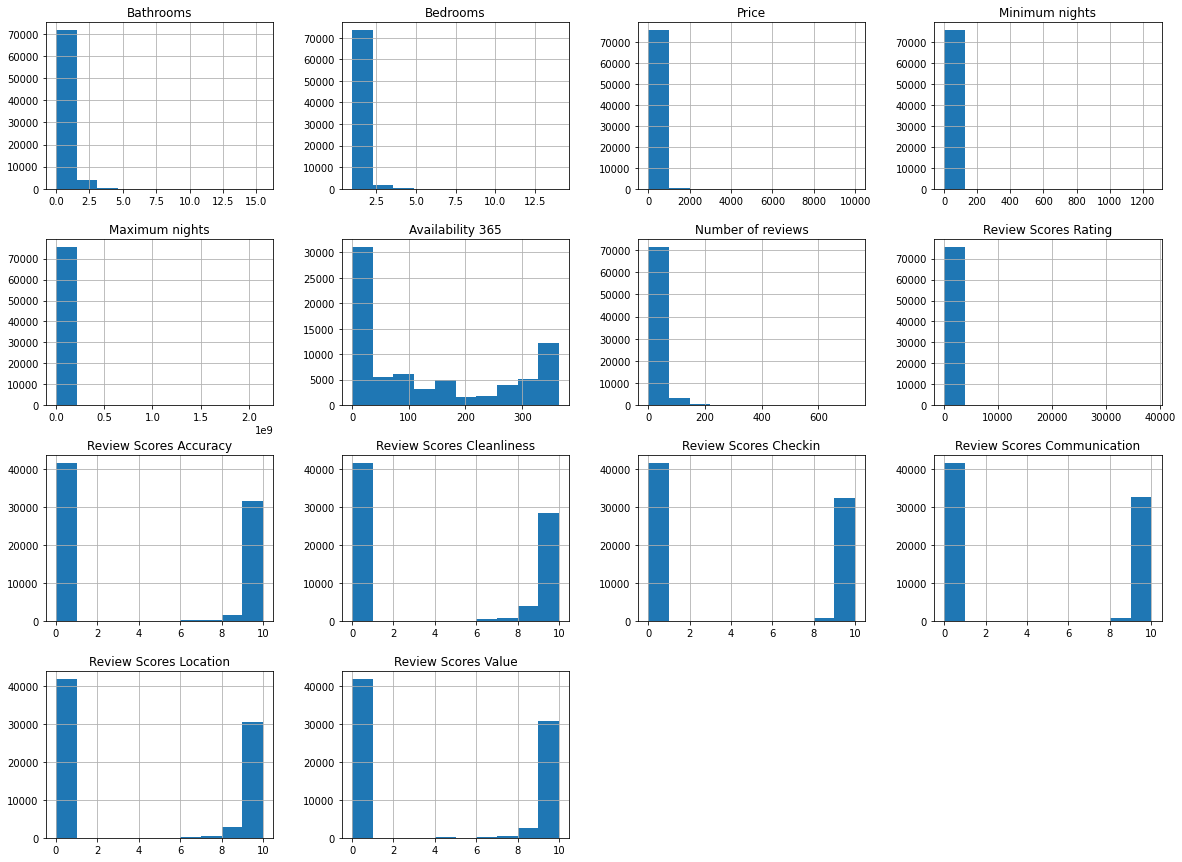

In [16]:
DF=df[['Bathrooms','Bedrooms','Price','Minimum nights','Maximum nights','Availability 365','Number of reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value']]
DF2=df[['Host total listings count','latitude','longitude','Accommodates']]
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
DF.hist(ax = ax)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1037aaaa90>,
      dtype=object)

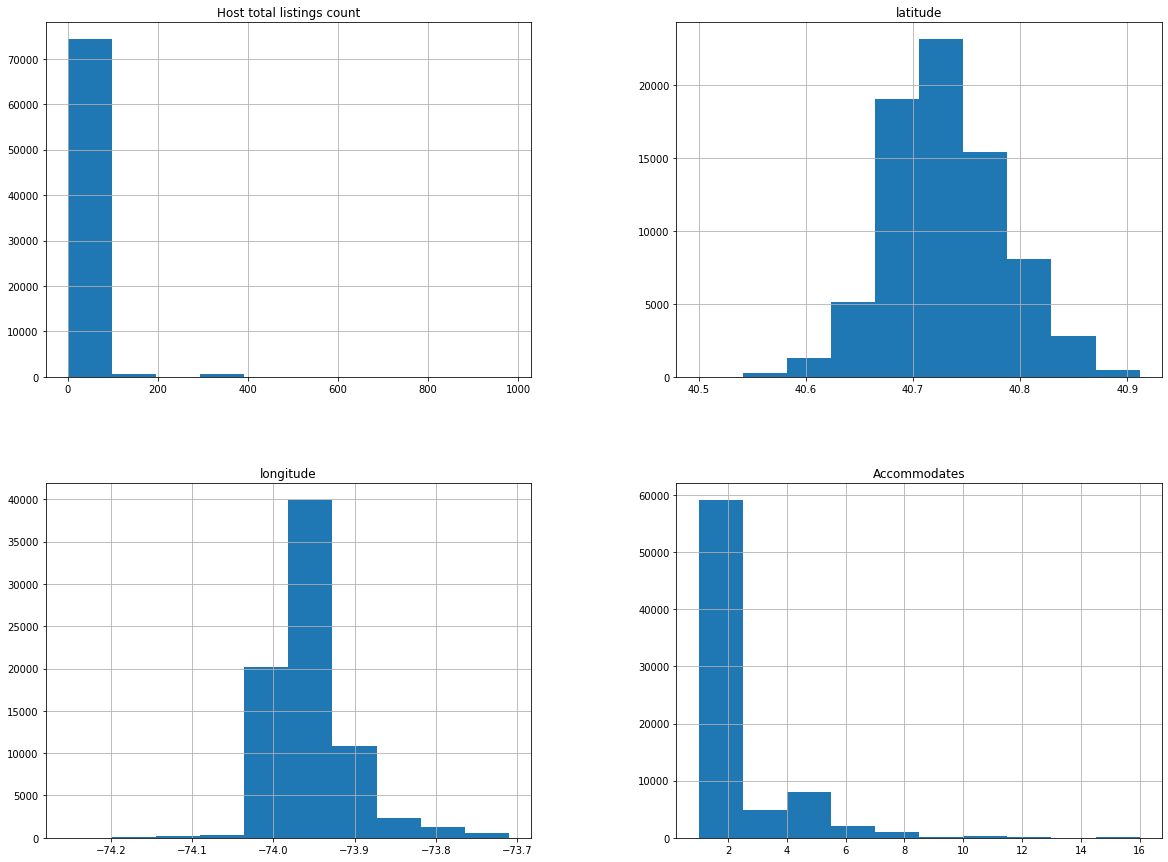

In [17]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
DF2.hist(ax = ax)

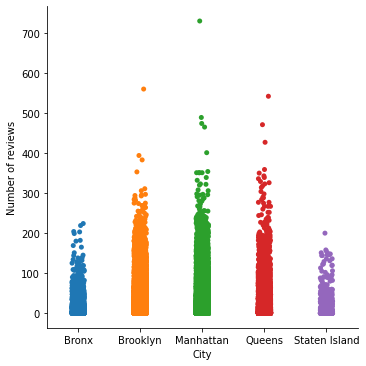

In [18]:
sns.catplot(x='City', y='Number of reviews', data=df)

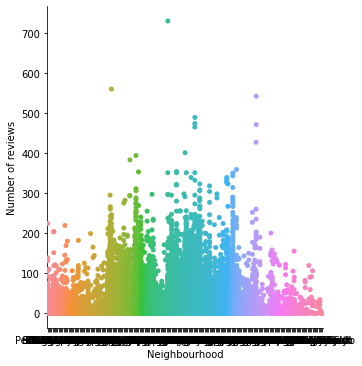

In [19]:
sns.catplot(x='Neighbourhood', y='Number of reviews', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'City')

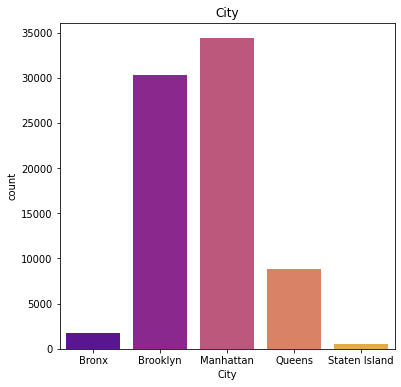

In [20]:
sns.countplot(df['City'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('City')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

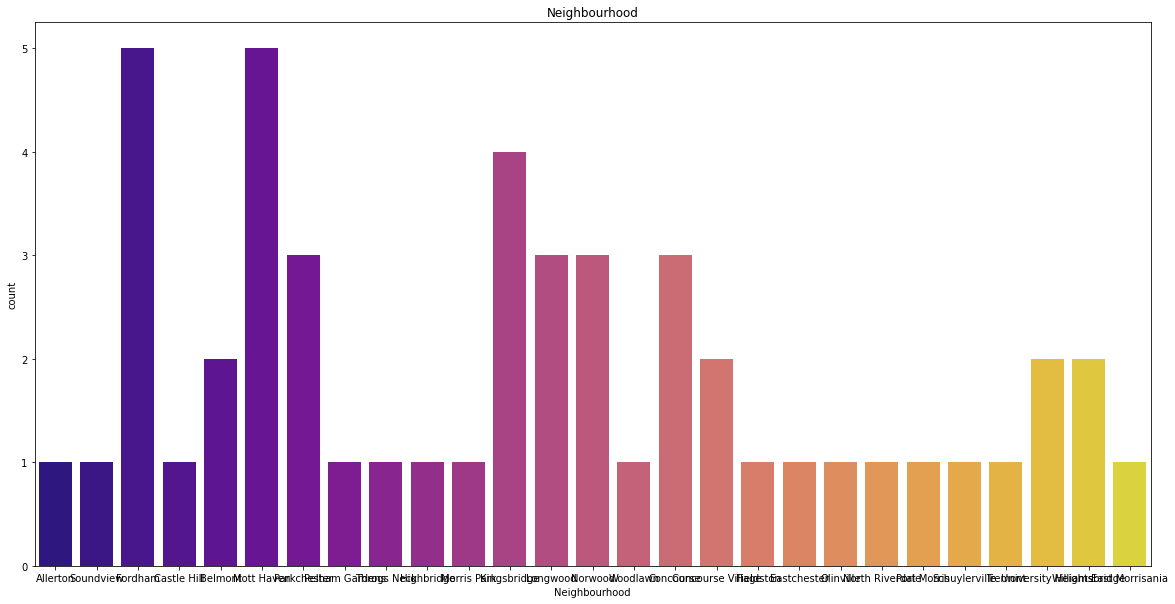

In [21]:
sns.countplot(df['Neighbourhood'][:50], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhood')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room Type')

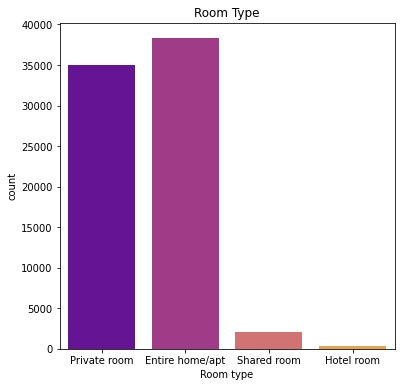

In [22]:
sns.countplot(df['Room type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Room Type')

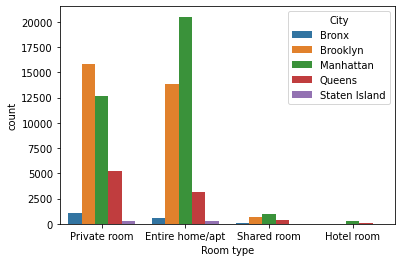

In [23]:
sns.countplot(x = df['Room type'], hue = 'City', data = df)

**Box-Plot Depicting Availabilty of the houses in all Cities**


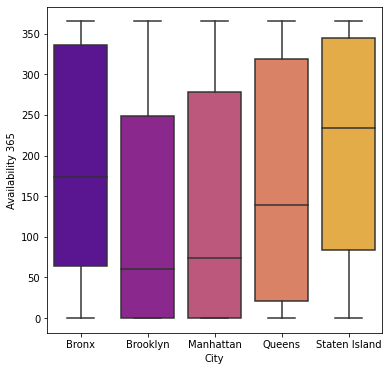

In [24]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df, x='City',y='Availability 365',palette='plasma')

**Scatter-Plots of the Properties in various Cities**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


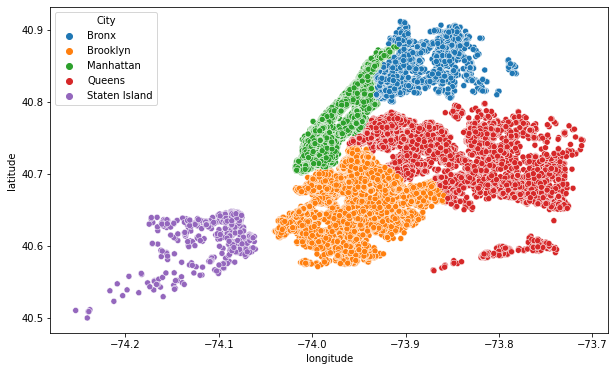

In [25]:
plt.figure(figsize=(10,6))
df.cities=df['City']
sns.scatterplot(df.longitude ,df.latitude,hue=df.cities)
plt.ioff()

**Scatter-Plot of Types of rooms in New York**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


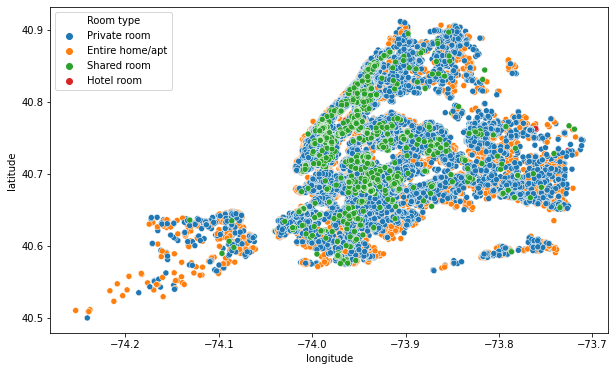

In [26]:
plt.figure(figsize=(10,6))
df.room_types=df['Room type']
sns.scatterplot(df.longitude ,df.latitude,hue=df.room_types)
plt.ioff()

In [27]:
import plotly
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoiaGFyc2h1YmgiLCJhIjoiY2toMDZ3ODRxMHY1ZDJxbnZqdmJjeTExYSJ9.8ucXhwpGCNvvDWrN2yj9yw')
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude', color='Room type', size_max=100, zoom=8)
fig.show()

In [28]:
import pandas as pd
import plotly.express as px
import numpy as np
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="Accommodates", zoom=9, mapbox_style='open-street-map')
fig.show()

**Scatter-Plot of types of Properties in New York**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



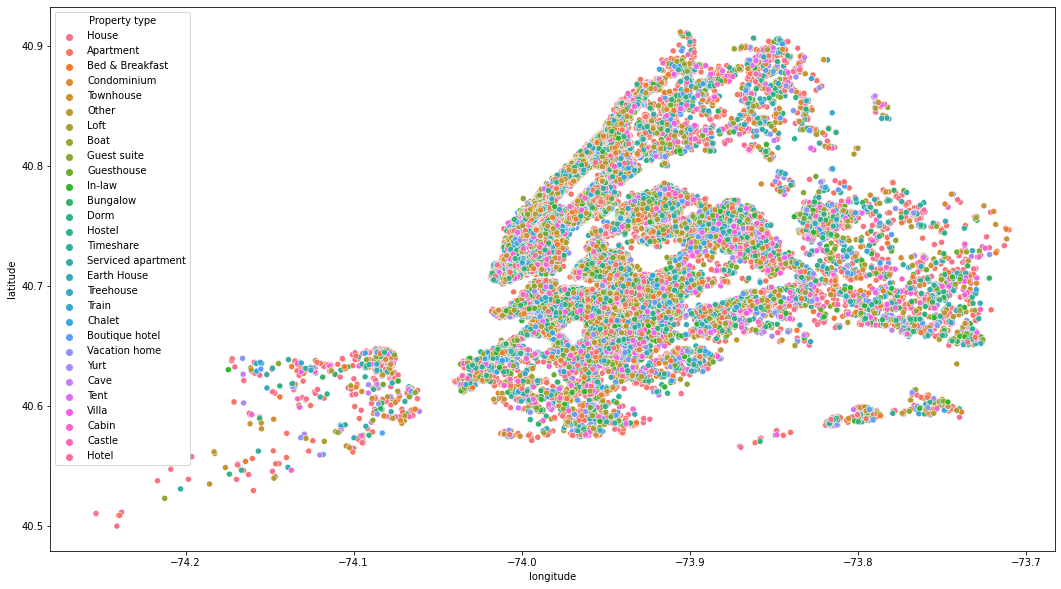

In [29]:
import plotly
import plotly.express as px
plt.figure(figsize=(18,10))
df.room_types=df['Property type']
px.set_mapbox_access_token('pk.eyJ1IjoiaGFyc2h1YmgiLCJhIjoiY2toMDZ3ODRxMHY1ZDJxbnZqdmJjeTExYSJ9.8ucXhwpGCNvvDWrN2yj9yw')
sns.scatterplot(df.longitude ,df.latitude,hue=df.room_types)
plt.ioff()

In [30]:
import plotly
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoiaGFyc2h1YmgiLCJhIjoiY2toMDZ3ODRxMHY1ZDJxbnZqdmJjeTExYSJ9.8ucXhwpGCNvvDWrN2yj9yw')
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude', color='Property type', size_max=100, zoom=8)
fig.show()

**Scatter-Plot showing the number of days the Properties are Available**






In [31]:
df['Availability 365']=df['Availability 365'].replace(0,math.floor(df['Availability 365'].mean()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



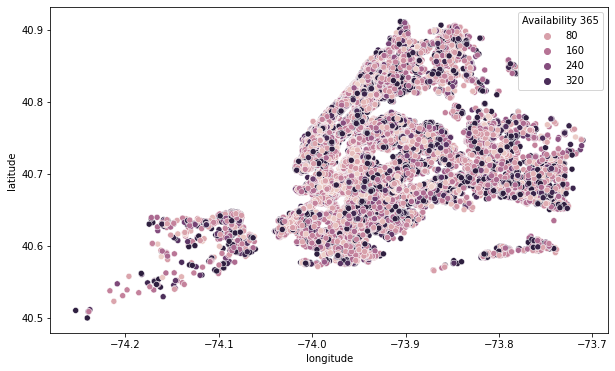

In [32]:
plt.figure(figsize=(10,6))
df.availability_365=df['Availability 365']
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

**Scatter-Plot of the Review score of the Property**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



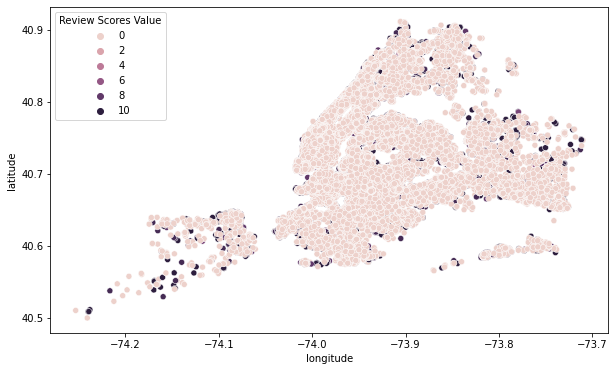

In [33]:
plt.figure(figsize=(10,6))
df.review_rating=df['Review Scores Value']
sns.scatterplot(df.longitude,df.latitude,hue=df.review_rating)
plt.ioff()

# ***Type of Distribution***

There are various methods to check for Normality.
We have plotted a Q-Q Plot and performed the KS test to check for Normality.

**KS TEST**



If the observed data perfectly follows a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution

If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution


Here,we have applied KS test to  'Availability 365' column which tells us how many days in a year the property is available.And we observe that it follows Normal Distribution since our value is p value is more than 0.05

In [36]:
from scipy.stats import kstest,norm
df['Availability 365']=norm.rvs(size=len(df['Availability 365']))
ks_statistic,p_value=kstest(df['Availability 365'],'norm')
print(ks_statistic,p_value)

0.005117740535814097 0.03782898883491711


**QQ Plot - Quantile vs Quantile Plot**

The QQ Plot allows us to see deviation of a normal distribution much better than in a Histogram or box plot.
Here, we have plotted a Quantile vs. Quantile plot on 'Availability 365' column which tells us how many days in a year the property is available.And we observe that it follows Normal Distribution.

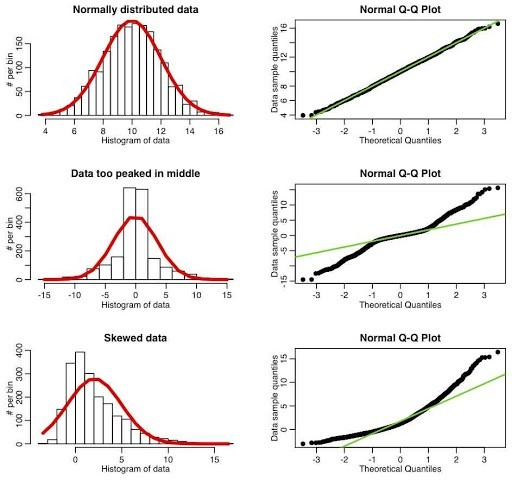

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



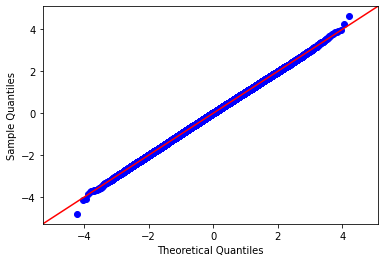

In [37]:
import statsmodels.api as sm 
import pylab as py 
sm.qqplot(df['Availability 365'],line='45') 
py.show() 

#***Correlation Matrix***

Correlation is a measure of a mutual relationship between two variables 

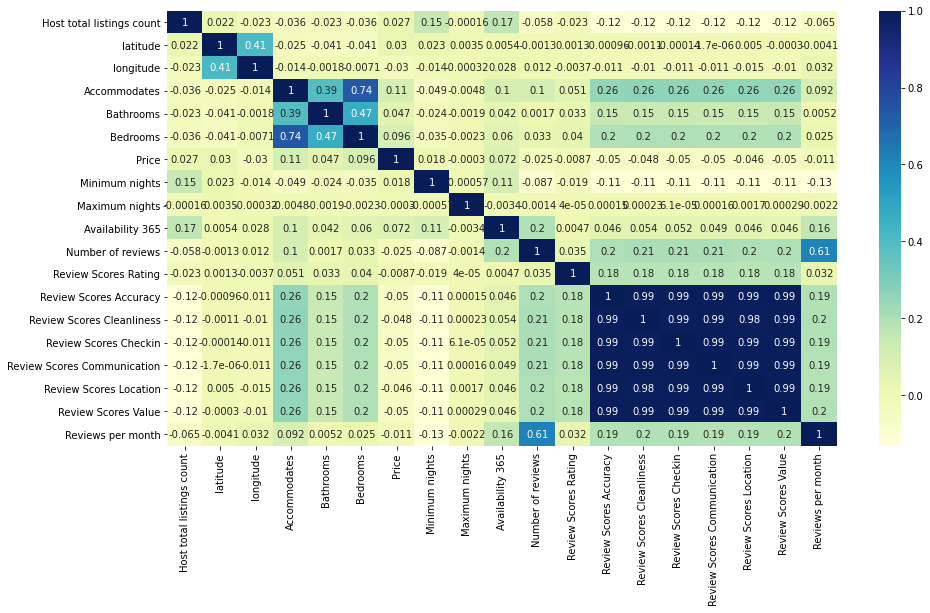

In [ ]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(),cmap ='YlGnBu', annot = True)

**Covariance Matrix**

Two variables are related based on how these variables change in relation with each other.

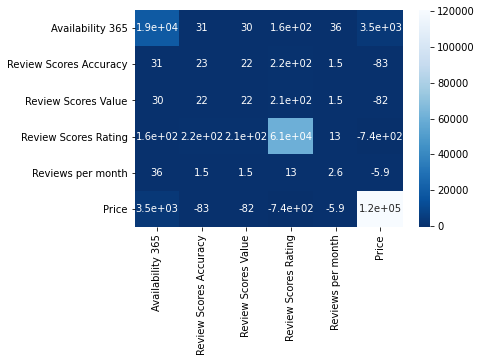

<Figure size 1296x864 with 0 Axes>

In [ ]:
import pandas as pd
DF=df[['Availability 365','Review Scores Accuracy','Review Scores Value','Review Scores Rating','Reviews per month','Price']]
cov_matrix=DF.cov()
sns.heatmap(cov_matrix,cmap='Blues_r',annot=True)
plt.figure(figsize=(18,12))
plt.show()





#***Hypothesis Testing***


Now for a Z test The below code is an example of a z-test. The test is to see if the group a sample's 'mean price' is smaller than the population mean.

H0 = The average prices of the houses in Manhattan/Brooklyn is the same as the average prices of the whole of New York.

H1 = The average prices of the houses in Manhattan/Brooklyn is smaller than the average prices of the whole of New York




In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as mstats

df = df.sample(frac=1)

manhattan_sample = df[df['City'] == 'Manhattan']
manhattan_sample = manhattan_sample[:50]

brooklyn_sample = df[df['City'] == 'Brooklyn']
brooklyn_sample = brooklyn_sample[:50]

population_mean = df['Price'].mean()
manhattan_sample_mean = manhattan_sample['Price'].mean()
brooklyn_sample_mean = brooklyn_sample['Price'].mean()

print('New York Mean:  ',population_mean,'Manhattan Mean:  ',manhattan_sample_mean)
print('New York Mean:  ',population_mean,'Brooklyn Mean:  ',brooklyn_sample_mean)





New York Mean:   154.54574977887498 Manhattan Mean:   203.38
New York Mean:   154.54574977887498 Brooklyn Mean:   100.34


In [ ]:
zstat, pvalue = mstats.ztest(manhattan_sample['Price'],x2=None,value=population_mean,alternative='smaller')
print('Manhattan:  ',float(pvalue))
if pvalue<0.05:
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")


Manhattan:   0.9987055622055933
Accepting null hypothesis


In [ ]:
zstat, pvalue = mstats.ztest(brooklyn_sample['Price'],x2=None,value=population_mean,alternative='smaller')
print('Brooklyn:  ',float(pvalue))
if pvalue<0.05:
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

Brooklyn:   3.506604028935684e-07
Rejecting null hypothesis


**Regression** **Analysis**

# ***Linear Regression***
It is used when we want to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable . The variable we are using to predict the other variable's value is called the independent variable 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication']]
Y = df[ 'Review Scores Value']
X = preprocessing.normalize(X)
X = np.hstack((np.ones( (len(df['Review Scores Accuracy']) ,1)), X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60599, 4)
(15150, 4)
(60599,)
(15150,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression().fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2*100))
print("\n")
print('Score  :',lin_model.score(X,Y))
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2*100))

The model performance for training set
--------------------------------------
RMSE is 0.6744874063930492
R2 score is 97.94269238369306


Score  : 0.9791683066842829
The model performance for testing set
--------------------------------------
RMSE is 0.6946623109546083
R2 score is 97.81310112312327


# ***Decision Tree*** 

In [ ]:
data_tree=df[['Neighbourhood','City','Room type','Minimum nights','Number of reviews','Price']]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_tree['Neighbourhood_new'] = labelencoder.fit_transform(data_tree['Neighbourhood'])
data_tree['City_new'] = labelencoder.fit_transform(data_tree['City'])
data_tree['Room_type_new'] = labelencoder.fit_transform(data_tree['Room type'])
print(data_tree.head())
data_tree=data_tree[data_tree.Price<=180]
data_tree=data_tree[data_tree.Price>=90]
len(data_tree)

        Neighbourhood       City        Room type  Minimum nights  \
19156    Williamsburg   Brooklyn     Private room               1   
30496  Hell's Kitchen  Manhattan     Private room               2   
1332    Crown Heights   Brooklyn  Entire home/apt               3   
47724      Greenpoint   Brooklyn  Entire home/apt               2   
61678          Nolita  Manhattan     Private room               1   

       Number of reviews  Price  Neighbourhood_new  City_new  Room_type_new  
19156                  1     68                220         1              2  
30496                 26    119                 99         2              2  
1332                   3    150                 52         1              0  
47724                 51    139                 95         1              0  
61678                 61     69                150         2              2  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

28630

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(data_tree[['Neighbourhood_new','City_new','Room_type_new','Minimum nights','Number of reviews']],data_tree[['Price']],test_size=0.1,random_state=0)
Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(x_train,y_train)
y=y_test['Price']
predict=Reg_tree.predict(x_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-predict),np.array(1/y_test)))))



median absolute deviation (MAD):  0.172739882281615


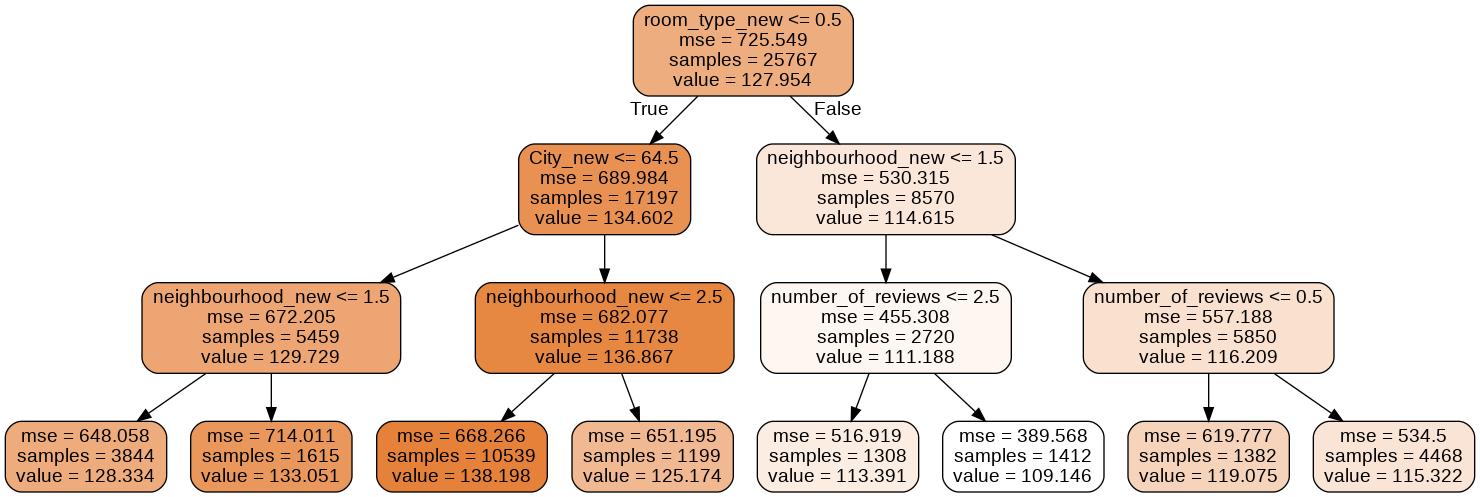

In [ ]:
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
from sklearn.tree import export_graphviz
with open("tree1.dot", 'w') as f:
     f = export_graphviz(Reg_tree,out_file=f,max_depth = 3,impurity = True,feature_names = ['City_new','neighbourhood_new','room_type_new','minimum_nights','number_of_reviews'],rounded = True,filled= True )
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rmse = (np.sqrt(mean_squared_error(y_test, predict)))
r2=r2_score(y_test,predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2*100))

The model performance for testing set
--------------------------------------
RMSE is 25.107643449966275
R2 score is 11.052258712446172


#***Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication']]
Y = df[ 'Review Scores Value']
X = preprocessing.normalize(X)
X = np.hstack((np.ones( (len(df['Review Scores Accuracy']) ,1)), X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

regressor = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)



print("************************************************************************************************************************************************************")
print("\t\t\t\t\t\t\tRandom Forest Regressor")
print("R Score: ",r2_score(Y_test, y_pred))
print("Rmse :",mean_squared_error(Y_test, y_pred))
#sns.regplot(y = Y_test, x = y_pred, color = 'blue')

************************************************************************************************************************************************************
							Random Forest Regressor
R Score:  0.9837930433956219
Rmse : 0.3569946250469154


#***Ridge Regression***

In [ ]:
!pip install mglearn
from sklearn.linear_model import Ridge
import mglearn
X = df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication','Review Scores Checkin','Review Scores Location']]
Y = df[ 'Review Scores Value']
X = preprocessing.normalize(X)
X = np.hstack((np.ones( (len(df['Review Scores Accuracy']) ,1)), X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
ridge = Ridge(alpha=1.0).fit(X_train, Y_train)
print("\n\n\nridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score:{:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,Y_test)))






ridge.coef_: [ 0.          4.36482588  5.03398906 -1.65577731  6.51881389  6.89035178]
ridge.intercept_: -0.006668556809833248
Training set score:0.98
Test set score: 0.98


#***Lasso Regression*** 

In [ ]:
from sklearn.linear_model import Lasso
X =  df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication','Review Scores Checkin','Review Scores Location']]
Y = df[ 'Review Scores Value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lasso = Lasso().fit(X_train, Y_train)

print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score:{:.2f}".format(lasso.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,Y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!= 0)))

lasso.coef_: [0.21536533 0.04752254 0.06218553 0.35673392 0.25254788]
lasso.intercept_: 0.18182123714914855
Training set score:0.99
Test set score: 0.99
Number of features used: 5


#***Naive Bayes***

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#DF=df[['',]]
X = df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication','Review Scores Checkin','Review Scores Location']]
Y = df[ 'Review Scores Value']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(53024, 5) (22725, 5)
(53024,) (22725,)


In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

(53024, 5) (22725, 5)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 9, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Model accuracy score: 0.8563
Training set score: 0.8544
Test set score: 0.8563


#***KNN***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df[['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication']][:200]
Y = df[ 'Review Scores Value'][:200]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1,  train_scores_ind))))

Max train score 87.85714285714286 % and k = [3]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 85.0 % and k = [7, 8, 9, 10, 11, 12, 13, 14]


#***K Means***

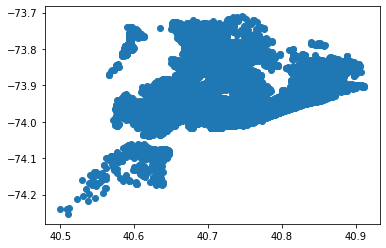

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.spatial import distance
from sklearn.cluster import KMeans

df1=df.dropna()

DF=df[['latitude','longitude']]
X=DF.iloc[:,[0,1]].values
len_X= len(X)
wcss = []

plt.scatter(df['latitude'],df['longitude'])

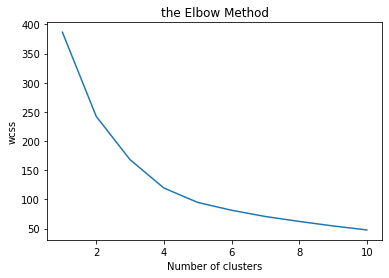

In [ ]:
for i in range(1,11):

	kmeans = KMeans(n_clusters = i, init='k-means++',max_iter = 300 ,n_init =10)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("the Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()


[237289.10905541526, 221850.63257082034, 234527.71055305484, 232309.15843670134, 232339.74759996316, 231692.60612952194, 237489.2314793127, 242619.80902123812, 238054.08306224638, 243752.95909776443]


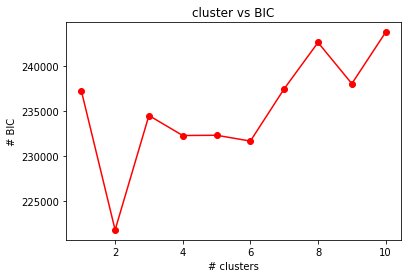

Best K value =  5


In [ ]:
def Bic_func(kmeans,r=len_X):
	
		centers = [kmeans.cluster_centers_]
		labels  = kmeans.labels_
		m = kmeans.n_clusters    
		n = np.bincount(labels)
		N, d = X.shape
		cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

		const_term = 0.5 * m * np.log(N) * (d+1)
		bic = np.sum([n[i] * np.log(n[i]) -n[i] * np.log(N) -((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
		
		return bic
		
def best_k(BIC):
	temp= []
	for i in range(0,10):
		tem=BIC[i]/100
		temp.append(int(tem))
	for j in range(1,10):
		if(temp[j]==temp[j-1]):
			return j+1

BIC=[]
for i in range (1,11):
	kmeans = KMeans(n_clusters = i, init='k-means++',max_iter = 300 ,n_init =10)
	kmeans.fit(X)	
	Bic=Bic_func(kmeans,r=len_X)
	BIC.append(Bic)
print(BIC)
ks=range(1,11)
plt.plot(ks,BIC,'r-o')
plt.title("cluster vs BIC")
plt.xlabel("# clusters")
plt.ylabel("# BIC")
plt.show()
k=best_k(BIC)
print("Best K value = ",k)


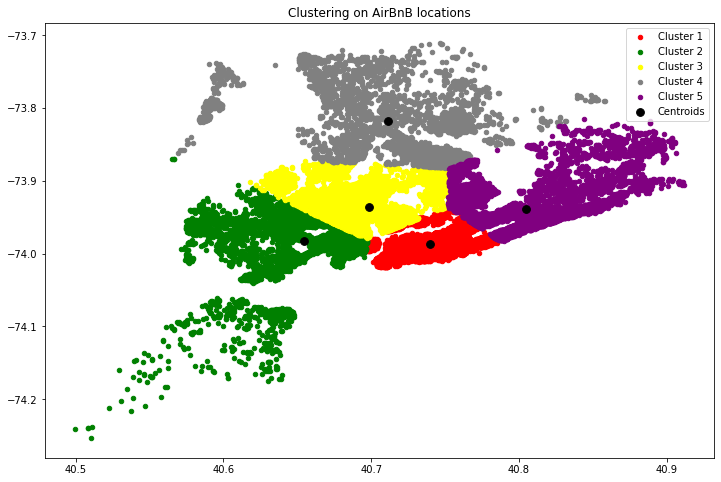

In [ ]:
kmeans= KMeans(n_clusters = 5 , init = 'k-means++',max_iter = 300 ,n_init=10)
y_kmeans = kmeans.fit_predict(X)
fig=plt.figure(figsize=(12,8))
ax=plt
ax.scatter(X[y_kmeans == 0 ,0], X[y_kmeans == 0,1],s =20, c = 'red',label = 'Cluster 1')

ax.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1,1]  ,s =20, c = 'green',label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2,1]  ,s =20, c = 'yellow',label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3 ,0], X[y_kmeans == 3,1]  ,s =20, c = 'grey',label = 'Cluster 4')
ax.scatter(X[y_kmeans == 4 ,0], X[y_kmeans == 4,1]  ,s =20, c = 'purple',label = 'Cluster 5')
ax.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1],s = 60,c='Black',label='Centroids')
plt.title('Clustering on AirBnB locations')

plt.legend()	
plt.show()

